In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Welcome to JupyROOT 6.24/06


In [2]:
Analyse_Secondaries = 1 
Theta_min_cut = 2.524
ThetaVerticalCut = 3.02

MaxHits = 50000
MaxPMTNo = 20
MaxPMTHits = 5000
Finger_Edep_Max = 10.0
AnaBar_Edep_Max = 10.0
pedastel_sigma = 2.9
Detector_Offset = 0

Finger_NPhotons_Max = 250
AnaBar_NPhotons_Max = 200

NUMPADDLE = 14

NMaxPMT = 14

Detector_pdg = np.array([0 for i in range(MaxHits)],dtype=int)
Detector_id = np.array([0 for i in range(MaxHits)],dtype=int)

Detector_x = np.array([0 for i in range(MaxHits)],dtype=float)
Detector_y = np.array([0 for i in range(MaxHits)],dtype=float)
Detector_z = np.array([0 for i in range(MaxHits)],dtype=float)
Detector_t = np.array([0 for i in range(MaxHits)],dtype=float)
Detector_Ed = np.array([0 for i in range(MaxHits)],dtype=float)

PMT_Nphotons = np.array([0 for i in range(MaxPMTNo)],dtype=int)
PMT_Nphotons_Noise = np.array([0 for i in range(MaxPMTNo)],dtype=int)

PMT_KineticEnergy = np.array([[0 for i in range(MaxPMTNo)] for j in range(MaxPMTHits)],dtype=float)

In [3]:
f = root.TFile("data/AnaBarMC_77777.root")
f.ls()

myTree = f.Get("T")
myTree.Show(0)

entries = myTree.GetEntriesFast()

hFingerX = root.TH1F("hFingerX","Finger X Position",100,-120,120)
hFingerY = root.TH1F("hFingerY","Finger Y Position",100,30,80)
hFingerZ = root.TH1F("hFingerZ","Finger Z Position",100,-140,60)
hFingerT = root.TH1F("hFingerT","Finger Time",100,0.0,0.4)

hPrimE = root.TH1F("hPrimE","Primary Energy", 100, 0, 25000)
hPrimTh = root.TH1F("hPrimTh","Primary Theta", 100, 0, np.pi)
hPrimPh = root.TH1F("hPrimPh","Primary Phi", 100, 0, 2.0*np.pi)
hPrimPdg = root.TH1F("hPrimPdg","Primary PDG ID", 30, 0, 30)

hDetectorNhits = root.TH1F("hDetectorNhits","Detector Number of Hits", 100, 0, 400)
hDetectorPdg = root.TH1F("hDetectorPdg","Detector PDG ID", 50, -20, 30)
hDetectorID = root.TH1F("hDetectorID","Detector ID Number", 30, 0, 30)
hPMTID = root.TH1F("hPMTID","PMT ID Number", 15, 0, 15)

hFingerPMTNphot = root.TH1F("hFingerPMTNphot","Finger PMT Number of Photons", Finger_NPhotons_Max+10, -10, Finger_NPhotons_Max)
hFingerEd = root.TH1F("hFingerEd","Finger Energy Deposited", 100, 0.01, Finger_Edep_Max)

hAnaBarPMTNphot = []
hAnaBarPMTNphotCut = []

for i in range(NUMPADDLE):  
    name = ("hAnaBarPMTNphotA%d" % i)
    title = ("hAnaBar_PMT_Number_of_Photons_A%d" % i)
    print (name,title)
    hAnaBarPMTNphot.append(root.TH1F(name, title, int(AnaBar_NPhotons_Max*0.9+20), -20, int(AnaBar_NPhotons_Max*0.9)))

for i in range(NUMPADDLE):  
    name = ("AnaBarPMTNphotA%dCut" % i)
    title = ("AnaBar_PMT_Number_of_Photons_A%d_Cut" % i)
    print (name,title)
    hAnaBarPMTNphotCut.append(root.TH1F(name, title, int(AnaBar_NPhotons_Max*0.9+20), -20, int(AnaBar_NPhotons_Max*0.9)))

hAnaBarEd = root.TH1F("hAnaBarEd","AnaBar Energy Deposited", 100, 0.01, AnaBar_Edep_Max)
hAnaBarEdCut = root.TH1F("AnaBarEdCut","AnaBar Energy Deposited", 100, 0.01, AnaBar_Edep_Max)

hAnaBarX = root.TH1F("AnaBarX","AnaBar X Position", 100, -120, 120)
hAnaBarY = root.TH1F("AnaBarY","AnaBar Y Position", 100, -30, 30)
hAnaBarZ = root.TH1F("AnaBarZ","AnaBar Z Position", 100, -30, 30)
hAnaBarT = root.TH1F("AnaBarT","AnaBar Time", 100, 0, .4)

hE1vsE2 = root.TH2F("E1vsE2", "AnaBar Edep vs. Finger Edep", 100, 0.01, Finger_Edep_Max, 100, 0.01, AnaBar_Edep_Max)

hFinger_Edep_vs_Nphot = root.TH2F("FingerEdepVsNphot", "Finger Edep vs. Number of Photons", Finger_NPhotons_Max, 0, Finger_NPhotons_Max, 100, 0.01, Finger_Edep_Max)
hNphot0_vs_Nphot1 = root.TH2F("AnaBarVsFingerNphot", "AnaBar vs. Finger Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, Finger_NPhotons_Max, 0, Finger_NPhotons_Max)
hAnaBar_Edep_vs_Nphot = root.TH2F("AnaBarEdepVsNphot", "AnaBar Edep vs. Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, 100, 0.01, AnaBar_Edep_Max)
hAnaBar_Edep_vs_NphotCut = root.TH2F("AnaBarEdepVsNphotCut", "AnaBar Edep vs. Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, 100, 0.01, AnaBar_Edep_Max)

PMT_Nphotons_Total = 0

hAnaBarEdAll = []

for i in range(NUMPADDLE):
    name = ("AnaBarEd%d" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    hAnaBarEdAll.append(root.TH1F(name, title, 100, 0.01, AnaBar_Edep_Max))
    
hAnaBarEdAllCut = []

for i in range(NUMPADDLE):
    name = ("AnaBarEd%dCut" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    hAnaBarEdAllCut.append(root.TH1F(name, title, 100, 0.01, AnaBar_Edep_Max))

hAnaBarPMTNoiseCutNphot = []

for i in range(NUMPADDLE):
    name = ("AnaBarPMTNoiseCutNphotA%d" % i)
    title = ("AnaBar PMT Number of Photons A%d" % i)
    hAnaBarPMTNoiseCutNphot.append(root.TH1F(name, title, AnaBar_NPhotons_Max+20, -20, AnaBar_NPhotons_Max))
   # hAnaBarPMTNoiseCutNphot[i].SetLineColor("red")

hFingerPMTKE = root.TH1F("FingerPMTKE","Photon Wavelength Production Spectrum", 400, 300.0, 700.0)
hAnaBarPMTKEA1 = root.TH1F("AnaBarPMTKEA1","Photon Wavelength in WLS at PMT", 400, 300.0, 700.0)

hAnaBarMult = root.TH1F("AnaBarMult","Anabar PMT Multiplicity",12,0,12)

hPrimPx = root.TH1F("PrimPx","Primary Px", 100, -2000, 2000)
hPrimPz = root.TH1F("PrimPz","Primary Pz", 100, -2000, 2000)
hPrimPy = root.TH1F("PrimPy","Primary Py", 100, -25000, 0)

counter = 0

for i in range(entries):
    
    if (i%100 == 0):
        print("Event Number: %d" % i)
    
    anabar_hit_paddle = np.array([False for i in range(NMaxPMT)],dtype=bool)
    edeptot = np.array([0.0 for i in range(NMaxPMT)],dtype=float)
    edep0tot = 0.0
    
    myTree.GetEntry(i)
    
    trigger = False
    finger_hit = False
    anabar_hit = False
    anabar_top_hit = False
    anabar_bottom_hit = False
    j_finger = 0
    j_anabar = 0
    
    if (myTree.Prim_pdg == 11):
        fMass = 0.511
    else:
        if (myTree.Prim_pdg == 13):
            fMass = 105.7
        else:
            if (myTree.Prim_pdg == 2212):
                fMass = 938.28
            else:
                fMass = 939.5
    
    trigger2 = False
    trigger3 = False
    
    fMomentum = np.sqrt(myTree.Prim_E**2 - fMass**2)
    fPx = fMomentum*np.sin(myTree.Prim_Th)*np.cos(myTree.Prim_Ph)
    fPy = fMomentum*np.sin(myTree.Prim_Th)*np.sin(myTree.Prim_Ph)
    fPz = fMomentum*np.cos(myTree.Prim_Th)
    fNewTheta = np.arccos(fPy/fMomentum)
    if (fPx<0):
        fNewPhi = np.arctan(fPz/fPx)+np.pi
    else:
        if (fPx>0 and fPz<0):
            fNewPhi = np.arctan(fPz/fPx)+2.0*np.pi
        else:
            fNewPhi=np.arctan(fPz/fPx)
    
    for j in range(myTree.Detector_Nhits):
        if(myTree.Detector_id[j] == Detector_Offset and not finger_hit):
            finger_hit = True
            j_finger = j
            
        for ibar in range(1,15):
            if(myTree.Detector_id[j+Detector_Offset] == ibar+Detector_Offset):
                anabar_hit = True
                anabar_hit_paddle[ibar-1]=True
                j_anabar = j
            
    if (finger_hit and anabar_hit):
        trigger = True
    
    if (finger_hit and anabar_hit and fNewTheta > Theta_min_cut):
        trigger2 = True
        
    if (finger_hit and anabar_hit and fNewTheta > ThetaVerticalCut):
        trigger3 = True
        
    if trigger:
        for icount in range(15):
            PMT_Nphotons_Noise[icount]=myTree.PMT_Nphotons[icount]+np.random.normal(loc=0.0,scale=pedastel_sigma)
                
        for i in range(NUMPADDLE):
            hAnaBarPMTNphot[i].Fill(PMT_Nphotons_Noise[i])
                
        hFingerPMTNphot.Fill(PMT_Nphotons_Noise[14])
        
    for j in range(myTree.Detector_Nhits):
        if trigger:
            if (myTree.Detector_id[j] == Detector_Offset and myTree.Detector_pdg[j] == myTree.Prim_pdg):
                counter = counter + 1
                hFingerX.Fill(myTree.Detector_x[j])
                hFingerY.Fill(myTree.Detector_y[j])
                hFingerZ.Fill(myTree.Detector_z[j])
                hFingerT.Fill(myTree.Detector_t[j])
                
            if (myTree.Detector_id[j] == Detector_Offset):
                hDetectorPdg.Fill(myTree.Detector_pdg[j])
                hDetectorID.Fill(myTree.Detector_id[j])
                
            if (myTree.Detector_id[j] == (1 + Detector_Offset)):
                hDetectorPdg.Fill(myTree.Detector_pdg[j])
                hDetectorID.Fill(myTree.Detector_id[j])
            
            if (myTree.Detector_id[j] == (1 + Detector_Offset) and myTree.Detector_pdg[j] == myTree.Prim_pdg):
                hAnaBarX.Fill(myTree.Detector_x[j])
                hAnaBarY.Fill(myTree.Detector_y[j])
                hAnaBarZ.Fill(myTree.Detector_z[j])
                hAnaBarT.Fill(myTree.Detector_t[j])

    #print ("Counter = ",counter)
            
    for j in range(myTree.Detector_Nhits):

        if (trigger):
            if (myTree.Detector_id[j] == Detector_Offset ):
                if (Analyse_Secondaries == 1 and fNewTheta > Theta_min_cut):
                    edep0tot += myTree.Detector_Ed[j];
                else:
                    if (myTree.Detector_pdg[j] == myTree.Prim_pdg and fNewTheta > Theta_min_cut):
                        edep0tot += myTree.Detector_Ed[j];
                        
            if (myTree.Detector_id[j] > Detector_Offset and myTree.Detector_id[j] <= NMaxPMT+Detector_Offset):
                if (Analyse_Secondaries == 1 and fNewTheta > Theta_min_cut):
                    edeptot[myTree.Detector_id[j]-1-Detector_Offset] += myTree.Detector_Ed[j]
                else:
                    if (myTree.Detector_pdg[j] == myTree.Prim_pdg and fNewTheta > Theta_min_cut):
                        edeptot[myTree.Detector_id[j]-1-Detector_Offset] += myTree.Detector_Ed[j]
            
    if trigger:
        hFingerEd.Fill(edep0tot)
        hAnaBarEd.Fill(edeptot[6])
        
        hE1vsE2.Fill(edep0tot, edeptot[6])
        
        #print(myTree.PMT_Nphotons[14])
        for jq in range(myTree.PMT_Nphotons[14]):
            if (myTree.PMT_KineticEnergy[jq] != 0):
                hFingerPMTKE.Fill(1240.0/myTree.PMT_KineticEnergy[jq])
            
        for iq in range(NUMPADDLE):
            for jq in range(myTree.PMT_Nphotons[iq]):
                if (myTree.PMT_KineticEnergy[jq] != 0):
                    hAnaBarPMTKEA1.Fill(1240.0/myTree.PMT_KineticEnergy[jq])
        
        imult = 0
        for icount in range(NUMPADDLE):
            if(PMT_Nphotons_Noise[icount]>=8):
                imult += 1
        
        hAnaBarMult.Fill(imult)
        
    if trigger2:
        PMT_Nphotons_Total = 0
        for icount in range(14):
            PMT_Nphotons_Total += myTree.PMT_Nphotons[icount]
        
        hFinger_Edep_vs_Nphot.Fill(myTree.PMT_Nphotons[14],edep0tot)
        hNphot0_vs_Nphot1.Fill(PMT_Nphotons_Total,myTree.PMT_Nphotons[14])
        hAnaBar_Edep_vs_Nphot.Fill(myTree.PMT_Nphotons[6],edeptot[6])
            
        for i in range(NUMPADDLE):
            hAnaBarEdAll[i].Fill(edeptot[i])
        
    
    if trigger3:
        hAnaBarEdCut.Fill(edeptot[6])
        for i in range(NUMPADDLE):
            hAnaBarPMTNphotCut[i].Fill(PMT_Nphotons_Noise[i])
            hAnaBarEdAllCut[i].Fill(edeptot[i])
            if(anabar_hit_paddle[i] and edeptot[i]>=4.0):
                hAnaBarPMTNoiseCutNphot[i].Fill(PMT_Nphotons_Noise[i])
                
        hAnaBar_Edep_vs_NphotCut.Fill(myTree.PMT_Nphotons[6],edeptot[6])

    hPrimE.Fill(myTree.Prim_E)
    hPrimTh.Fill(fNewTheta)
    hPrimPh.Fill(fNewPhi)
    hPrimPdg.Fill(myTree.Prim_pdg)
    
    hPMTID.Fill(myTree.PMT_id)
    hDetectorNhits.Fill(myTree.Detector_Nhits)

    hPrimPx.Fill(fPx)
    hPrimPy.Fill(fPy)
    hPrimPz.Fill(fPz)

hAnaBarPMTNphotA0 hAnaBar_PMT_Number_of_Photons_A0
hAnaBarPMTNphotA1 hAnaBar_PMT_Number_of_Photons_A1
hAnaBarPMTNphotA2 hAnaBar_PMT_Number_of_Photons_A2
hAnaBarPMTNphotA3 hAnaBar_PMT_Number_of_Photons_A3
hAnaBarPMTNphotA4 hAnaBar_PMT_Number_of_Photons_A4
hAnaBarPMTNphotA5 hAnaBar_PMT_Number_of_Photons_A5
hAnaBarPMTNphotA6 hAnaBar_PMT_Number_of_Photons_A6
hAnaBarPMTNphotA7 hAnaBar_PMT_Number_of_Photons_A7
hAnaBarPMTNphotA8 hAnaBar_PMT_Number_of_Photons_A8
hAnaBarPMTNphotA9 hAnaBar_PMT_Number_of_Photons_A9
hAnaBarPMTNphotA10 hAnaBar_PMT_Number_of_Photons_A10
hAnaBarPMTNphotA11 hAnaBar_PMT_Number_of_Photons_A11
hAnaBarPMTNphotA12 hAnaBar_PMT_Number_of_Photons_A12
hAnaBarPMTNphotA13 hAnaBar_PMT_Number_of_Photons_A13
AnaBarPMTNphotA0Cut AnaBar_PMT_Number_of_Photons_A0_Cut
AnaBarPMTNphotA1Cut AnaBar_PMT_Number_of_Photons_A1_Cut
AnaBarPMTNphotA2Cut AnaBar_PMT_Number_of_Photons_A2_Cut
AnaBarPMTNphotA3Cut AnaBar_PMT_Number_of_Photons_A3_Cut
AnaBarPMTNphotA4Cut AnaBar_PMT_Number_of_Photons_A4_Cu

In [24]:
g = root.TFile("data/AnaBarMC_88888.root")
g.ls()

gTree = g.Get("T")
gTree.Show(0)

entries = gTree.GetEntriesFast()

gFingerX = root.TH1F("gFingerX","Finger X Position",100,-120,120)
gFingerY = root.TH1F("gFingerY","Finger Y Position",100,30,80)
gFingerZ = root.TH1F("gFingerZ","Finger Z Position",100,-140,60)
gFingerT = root.TH1F("gFingerT","Finger Time",100,0.0,0.4)

gPrimE = root.TH1F("gPrimE","Primary Energy", 100, 0, 25000)
gPrimTh = root.TH1F("gPrimTh","Primary Theta", 100, 0, np.pi)
gPrimPh = root.TH1F("gPrimPh","Primary Phi", 100, 0, 2.0*np.pi)
gPrimPdg = root.TH1F("gPrimPdg","Primary PDG ID", 30, 0, 30)

gDetectorNhits = root.TH1F("gDetectorNhits","Detector Number of Hits", 100, 0, 400)
gDetectorPdg = root.TH1F("gDetectorPdg","Detector PDG ID", 50, -20, 30)
gDetectorID = root.TH1F("gDetectorID","Detector ID Number", 30, 0, 30)
gPMTID = root.TH1F("gPMTID","PMT ID Number", 15, 0, 15)

gFingerPMTNphot = root.TH1F("gFingerPMTNphot","Finger PMT Number of Photons", Finger_NPhotons_Max+10, -10, Finger_NPhotons_Max)
gFingerEd = root.TH1F("gFingerEd","Finger Energy Deposited", 100, 0.01, Finger_Edep_Max)

gAnaBarPMTNphot = []
gAnaBarPMTNphotCut = []

for i in range(NUMPADDLE):  
    name = ("gAnaBarPMTNphotA%d" % i)
    title = ("AnaBar_PMT_Number_of_Photons_A%d" % i)
    print (name,title)
    gAnaBarPMTNphot.append(root.TH1F(name, title, int(AnaBar_NPhotons_Max*0.9+20), -20, int(AnaBar_NPhotons_Max*0.9)))

for i in range(NUMPADDLE):  
    name = ("gAnaBarPMTNphotA%dCut" % i)
    title = ("AnaBar_PMT_Number_of_Photons_A%d_Cut" % i)
    print (name,title)
    gAnaBarPMTNphotCut.append(root.TH1F(name, title, int(AnaBar_NPhotons_Max*0.9+20), -20, int(AnaBar_NPhotons_Max*0.9)))

gAnaBarEd = root.TH1F("gAnaBarEd","AnaBar Energy Deposited", 100, 0.01, AnaBar_Edep_Max)
gAnaBarEdCut = root.TH1F("gAnaBarEdCut","AnaBar Energy Deposited", 100, 0.01, AnaBar_Edep_Max)

gAnaBarX = root.TH1F("gAnaBarX","AnaBar X Position", 100, -120, 120)
gAnaBarY = root.TH1F("gAnaBarY","AnaBar Y Position", 100, -30, 30)
gAnaBarZ = root.TH1F("gAnaBarZ","AnaBar Z Position", 100, -30, 30)
gAnaBarT = root.TH1F("gAnaBarT","AnaBar Time", 100, 0, .4)

gE1vsE2 = root.TH2F("gE1vsE2", "AnaBar Edep vs. Finger Edep", 100, 0.01, Finger_Edep_Max, 100, 0.01, AnaBar_Edep_Max)

gFinger_Edep_vs_Nphot = root.TH2F("gFingerEdepVsNphot", "Finger Edep vs. Number of Photons", Finger_NPhotons_Max, 0, Finger_NPhotons_Max, 100, 0.01, Finger_Edep_Max)
gNphot0_vs_Nphot1 = root.TH2F("gAnaBarVsFingerNphot", "AnaBar vs. Finger Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, Finger_NPhotons_Max, 0, Finger_NPhotons_Max)
gAnaBar_Edep_vs_Nphot = root.TH2F("gAnaBarEdepVsNphot", "AnaBar Edep vs. Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, 100, 0.01, AnaBar_Edep_Max)
gAnaBar_Edep_vs_NphotCut = root.TH2F("gAnaBarEdepVsNphotCut", "AnaBar Edep vs. Number of Photons", AnaBar_NPhotons_Max, 0, AnaBar_NPhotons_Max, 100, 0.01, AnaBar_Edep_Max)

PMT_Nphotons_Total = 0

gAnaBarEdAll = []

for i in range(NUMPADDLE):
    name = ("gAnaBarEd%d" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    gAnaBarEdAll.append(root.TH1F(name, title, 100, 0.01, AnaBar_Edep_Max))
    
gAnaBarEdAllCut = []

for i in range(NUMPADDLE):
    name = ("gAnaBarEd%dCut" % i)
    title = ("AnaBar Energy Deposited A%d" % i)
    gAnaBarEdAllCut.append(root.TH1F(name, title, 100, 0.01, AnaBar_Edep_Max))

gAnaBarPMTNoiseCutNphot = []

for i in range(NUMPADDLE):
    name = ("gAnaBarPMTNoiseCutNphotA%d" % i)
    title = ("AnaBar PMT Number of Photons A%d" % i)
    gAnaBarPMTNoiseCutNphot.append(root.TH1F(name, title, AnaBar_NPhotons_Max+20, -20, AnaBar_NPhotons_Max))
   # hAnaBarPMTNoiseCutNphot[i].SetLineColor("red")

gFingerPMTKE = root.TH1F("gFingerPMTKE","Photon Wavelength Production Spectrum", 400, 300.0, 700.0)
gAnaBarPMTKEA1 = root.TH1F("gAnaBarPMTKEA1","Photon Wavelength in WLS at PMT", 400, 300.0, 700.0)

gAnaBarMult = root.TH1F("gAnaBarMult","Anabar PMT Multiplicity",12,0,12)

gPrimPx = root.TH1F("gPrimPx","Primary Px", 100, -2000, 2000)
gPrimPz = root.TH1F("gPrimPz","Primary Pz", 100, -2000, 2000)
gPrimPy = root.TH1F("gPrimPy","Primary Py", 100, -25000, 0)

counter = 0

for i in range(entries):
    
    if (i%100 == 0):
        print("Event Number: %d" % i)
    
    anabar_hit_paddle = np.array([False for i in range(NMaxPMT)],dtype=bool)
    edeptot = np.array([0.0 for i in range(NMaxPMT)],dtype=float)
    edep0tot = 0.0
    
    gTree.GetEntry(i)
    
    trigger = False
    finger_hit = False
    anabar_hit = False
    anabar_top_hit = False
    anabar_bottom_hit = False
    j_finger = 0
    j_anabar = 0
    
    if (gTree.Prim_pdg == 11):
        fMass = 0.511
    else:
        if (gTree.Prim_pdg == 13):
            fMass = 105.7
        else:
            if (gTree.Prim_pdg == 2212):
                fMass = 938.28
            else:
                fMass = 939.5
    
    trigger2 = False
    trigger3 = False
    
    fMomentum = np.sqrt(gTree.Prim_E**2 - fMass**2)
    fPx = fMomentum*np.sin(gTree.Prim_Th)*np.cos(gTree.Prim_Ph)
    fPy = fMomentum*np.sin(gTree.Prim_Th)*np.sin(gTree.Prim_Ph)
    fPz = fMomentum*np.cos(gTree.Prim_Th)
    fNewTheta = np.arccos(fPy/fMomentum)
    if (fPx<0):
        fNewPhi = np.arctan(fPz/fPx)+np.pi
    else:
        if (fPx>0 and fPz<0):
            fNewPhi = np.arctan(fPz/fPx)+2.0*np.pi
        else:
            fNewPhi=np.arctan(fPz/fPx)
    
    for j in range(gTree.Detector_Nhits):
        if(gTree.Detector_id[j] == Detector_Offset and not finger_hit):
            finger_hit = True
            j_finger = j
            
        for ibar in range(1,15):
            if(gTree.Detector_id[j+Detector_Offset] == ibar+Detector_Offset):
                anabar_hit = True
                anabar_hit_paddle[ibar-1]=True
                j_anabar = j
            
    if (finger_hit and anabar_hit):
        trigger = True
    
    if (finger_hit and anabar_hit and fNewTheta > Theta_min_cut):
        trigger2 = True
        
    if (finger_hit and anabar_hit and fNewTheta > ThetaVerticalCut):
        trigger3 = True
        
    if trigger:
        for icount in range(15):
            PMT_Nphotons_Noise[icount]=gTree.PMT_Nphotons[icount]+np.random.normal(loc=0.0,scale=pedastel_sigma)
                
        for i in range(NUMPADDLE):
            gAnaBarPMTNphot[i].Fill(PMT_Nphotons_Noise[i])
                
        gFingerPMTNphot.Fill(PMT_Nphotons_Noise[14])
        
    for j in range(gTree.Detector_Nhits):
        if trigger:
            if (gTree.Detector_id[j] == Detector_Offset and gTree.Detector_pdg[j] == gTree.Prim_pdg):
                counter = counter + 1
                gFingerX.Fill(gTree.Detector_x[j])
                gFingerY.Fill(gTree.Detector_y[j])
                gFingerZ.Fill(gTree.Detector_z[j])
                gFingerT.Fill(gTree.Detector_t[j])
                
            if (gTree.Detector_id[j] == Detector_Offset):
                gDetectorPdg.Fill(gTree.Detector_pdg[j])
                gDetectorID.Fill(gTree.Detector_id[j])
                
            if (gTree.Detector_id[j] == (1 + Detector_Offset)):
                gDetectorPdg.Fill(gTree.Detector_pdg[j])
                gDetectorID.Fill(gTree.Detector_id[j])
            
            if (gTree.Detector_id[j] == (1 + Detector_Offset) and gTree.Detector_pdg[j] == gTree.Prim_pdg):
                gAnaBarX.Fill(gTree.Detector_x[j])
                gAnaBarY.Fill(gTree.Detector_y[j])
                gAnaBarZ.Fill(gTree.Detector_z[j])
                gAnaBarT.Fill(gTree.Detector_t[j])

    #print ("Counter = ",counter)
            
    for j in range(gTree.Detector_Nhits):

        if (trigger):
            if (gTree.Detector_id[j] == Detector_Offset ):
                if (Analyse_Secondaries == 1 and fNewTheta > Theta_min_cut):
                    edep0tot += gTree.Detector_Ed[j];
                else:
                    if (gTree.Detector_pdg[j] == gTree.Prim_pdg and fNewTheta > Theta_min_cut):
                        edep0tot += gTree.Detector_Ed[j];
                        
            if (gTree.Detector_id[j] > Detector_Offset and gTree.Detector_id[j] <= NMaxPMT+Detector_Offset):
                if (Analyse_Secondaries == 1 and fNewTheta > Theta_min_cut):
                    edeptot[gTree.Detector_id[j]-1-Detector_Offset] += gTree.Detector_Ed[j]
                else:
                    if (gTree.Detector_pdg[j] == gTree.Prim_pdg and fNewTheta > Theta_min_cut):
                        edeptot[gTree.Detector_id[j]-1-Detector_Offset] += gTree.Detector_Ed[j]
            
    if trigger:
        gFingerEd.Fill(edep0tot)
        gAnaBarEd.Fill(edeptot[6])
        
        gE1vsE2.Fill(edep0tot, edeptot[6])
        
        #print(myTree.PMT_Nphotons[14])
        for jq in range(gTree.PMT_Nphotons[14]):
            if (gTree.PMT_KineticEnergy[jq] != 0):
                gFingerPMTKE.Fill(1240.0/gTree.PMT_KineticEnergy[jq])
            
        for iq in range(NUMPADDLE):
            for jq in range(gTree.PMT_Nphotons[iq]):
                if (gTree.PMT_KineticEnergy[jq] != 0):
                    gAnaBarPMTKEA1.Fill(1240.0/gTree.PMT_KineticEnergy[jq])
        
        imult = 0
        for icount in range(NUMPADDLE):
            if(PMT_Nphotons_Noise[icount]>=8):
                imult += 1
        
        gAnaBarMult.Fill(imult)
        
    if trigger2:
        PMT_Nphotons_Total = 0
        for icount in range(14):
            PMT_Nphotons_Total += gTree.PMT_Nphotons[icount]
        
        gFinger_Edep_vs_Nphot.Fill(gTree.PMT_Nphotons[14],edep0tot)
        gNphot0_vs_Nphot1.Fill(PMT_Nphotons_Total,gTree.PMT_Nphotons[14])
        gAnaBar_Edep_vs_Nphot.Fill(gTree.PMT_Nphotons[6],edeptot[6])
            
        for i in range(NUMPADDLE):
            gAnaBarEdAll[i].Fill(edeptot[i])
        
    
    if trigger3:
        gAnaBarEdCut.Fill(edeptot[6])
        for i in range(NUMPADDLE):
            gAnaBarPMTNphotCut[i].Fill(PMT_Nphotons_Noise[i])
            gAnaBarEdAllCut[i].Fill(edeptot[i])
            if(anabar_hit_paddle[i] and edeptot[i]>=4.0):
                gAnaBarPMTNoiseCutNphot[i].Fill(PMT_Nphotons_Noise[i])
                
        gAnaBar_Edep_vs_NphotCut.Fill(gTree.PMT_Nphotons[6],edeptot[6])

    gPrimE.Fill(gTree.Prim_E)
    gPrimTh.Fill(fNewTheta)
    gPrimPh.Fill(fNewPhi)
    gPrimPdg.Fill(gTree.Prim_pdg)
    
    gPMTID.Fill(gTree.PMT_id)
    gDetectorNhits.Fill(gTree.Detector_Nhits)

    gPrimPx.Fill(fPx)
    gPrimPy.Fill(fPy)
    gPrimPz.Fill(fPz)

gAnaBarPMTNphotA0 AnaBar_PMT_Number_of_Photons_A0
gAnaBarPMTNphotA1 AnaBar_PMT_Number_of_Photons_A1
gAnaBarPMTNphotA2 AnaBar_PMT_Number_of_Photons_A2
gAnaBarPMTNphotA3 AnaBar_PMT_Number_of_Photons_A3
gAnaBarPMTNphotA4 AnaBar_PMT_Number_of_Photons_A4
gAnaBarPMTNphotA5 AnaBar_PMT_Number_of_Photons_A5
gAnaBarPMTNphotA6 AnaBar_PMT_Number_of_Photons_A6
gAnaBarPMTNphotA7 AnaBar_PMT_Number_of_Photons_A7
gAnaBarPMTNphotA8 AnaBar_PMT_Number_of_Photons_A8
gAnaBarPMTNphotA9 AnaBar_PMT_Number_of_Photons_A9
gAnaBarPMTNphotA10 AnaBar_PMT_Number_of_Photons_A10
gAnaBarPMTNphotA11 AnaBar_PMT_Number_of_Photons_A11
gAnaBarPMTNphotA12 AnaBar_PMT_Number_of_Photons_A12
gAnaBarPMTNphotA13 AnaBar_PMT_Number_of_Photons_A13
gAnaBarPMTNphotA0Cut AnaBar_PMT_Number_of_Photons_A0_Cut
gAnaBarPMTNphotA1Cut AnaBar_PMT_Number_of_Photons_A1_Cut
gAnaBarPMTNphotA2Cut AnaBar_PMT_Number_of_Photons_A2_Cut
gAnaBarPMTNphotA3Cut AnaBar_PMT_Number_of_Photons_A3_Cut
gAnaBarPMTNphotA4Cut AnaBar_PMT_Number_of_Photons_A4_Cut
gAnaBar

In [25]:
c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
hFingerX.Draw()
gFingerX.Draw("same")
c1.cd(2)
hFingerY.Draw()
gFingerY.Draw("same")
c1.cd(3)
hFingerZ.Draw()
gFingerZ.Draw("same")
c1.cd(4)
hFingerT.Draw()
gFingerT.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


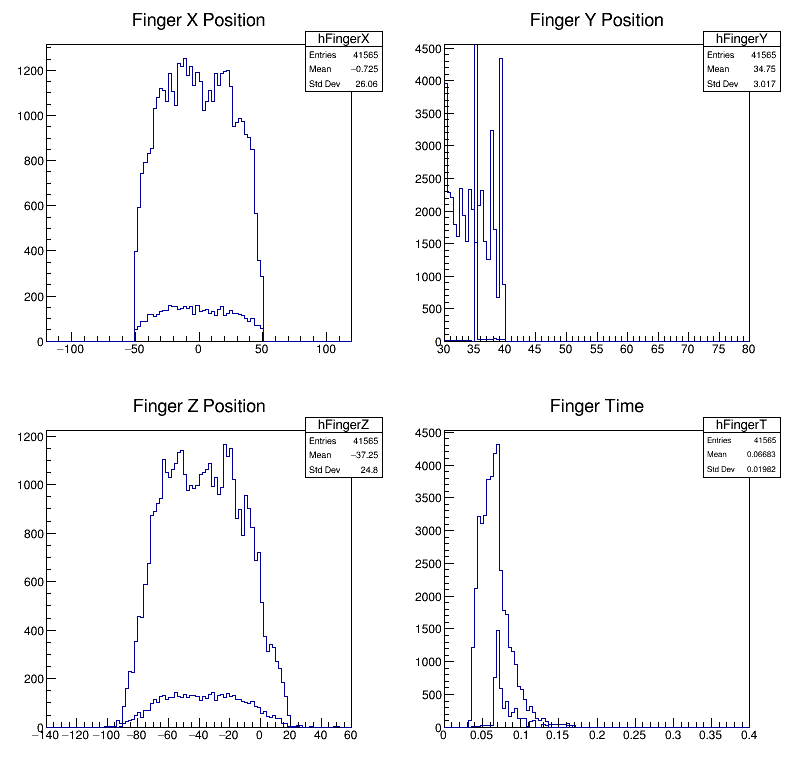

In [26]:
c1.Draw()

In [27]:
c2 = root.TCanvas("c2","c2",800,800)
c2.Divide(2,2,0.01,0.01,0)

c2.cd(1)
hPrimE.Draw()
gPrimE.Draw("same")
c2.cd(2)
hPrimTh.Draw()
gPrimTh.Draw("same")
c2.cd(3)
hPrimPh.Draw()
gPrimPh.Draw("same")
c2.cd(4)
hPrimPdg.Draw()
gPrimPdg.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


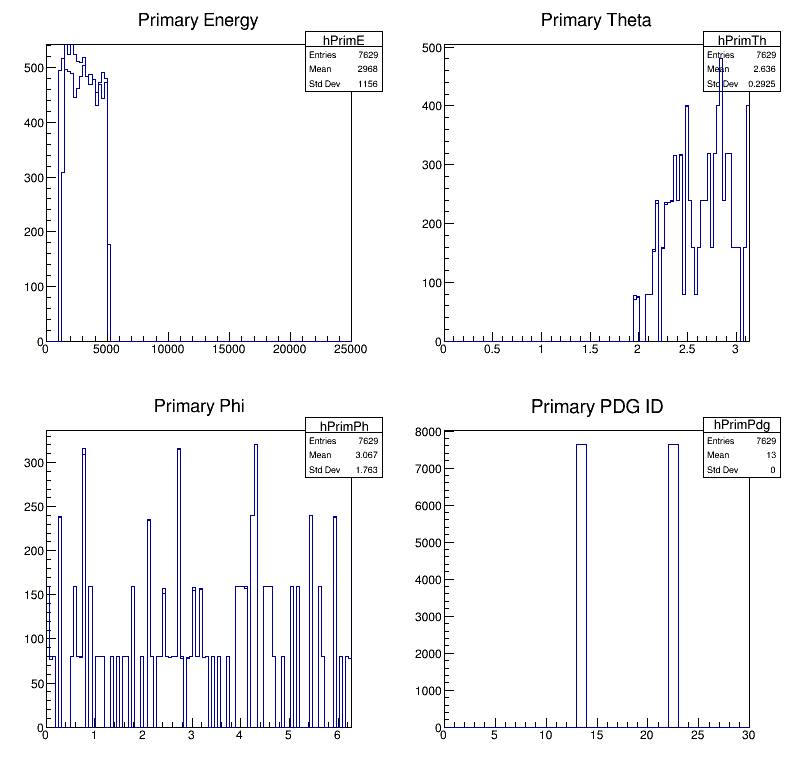

In [28]:
c2.Draw()

In [29]:
c3 = root.TCanvas("c2","c2",800,800)
c3.Divide(2,2,0.01,0.01,0)

c3.cd(1)
hDetectorNhits.Draw()
gDetectorNhits.Draw("same")
c3.cd(2)
hDetectorPdg.Draw()
gDetectorPdg.Draw("same")
c3.cd(3)
hDetectorID.Draw()
gDetectorID.Draw("same")
c3.cd(4)
hPMTID.Draw()
gPMTID.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


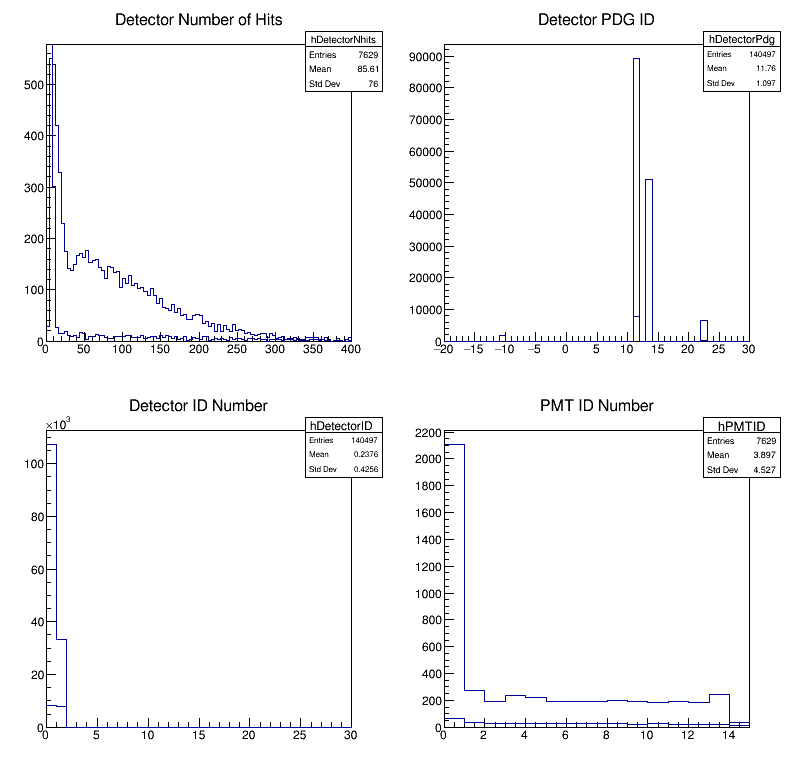

In [30]:
c3.Draw()

In [31]:
c4 = root.TCanvas("c4", "c4", 800,800)
c4.Divide(2,2, 0.01, 0.01, 0)
  
c4.cd(1)
hFingerEd.Draw()
gFingerEd.Draw("same")
c4.cd(2);
hFingerPMTNphot.Draw()
gFingerPMTNphot.Draw("same")
c4.cd(3)
hAnaBarEd.Draw()
gAnaBarEd.Draw("same")
c4.cd(4)
hAnaBarPMTNphot[0].Draw()
gAnaBarPMTNphot[0].Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


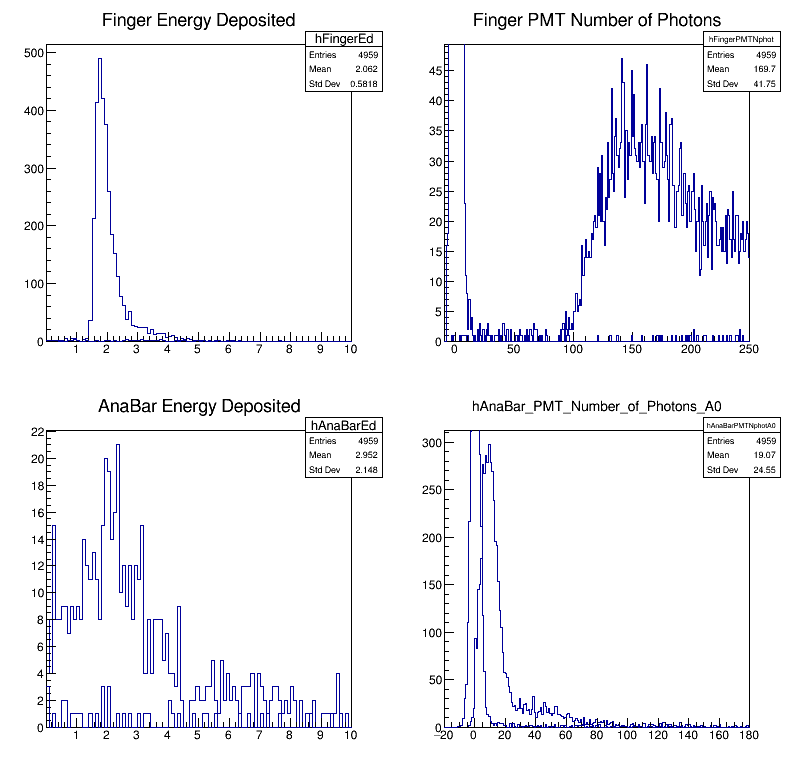

In [32]:
c4.Draw()

In [36]:
c5 = root.TCanvas("c5", "c5", 800,800)
c5.Divide(2,2, 0.01, 0.01, 0)

c5.cd(1)
hAnaBarX.Draw()
gAnaBarX.Draw("same")
c5.cd(2)
hAnaBarY.Draw()
gAnaBarY.Draw("same")
c5.cd(3)
gAnaBarZ.Draw()
hAnaBarZ.Draw("same")
c5.cd(4)
hAnaBarT.Draw()
gAnaBarT.Draw("same")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


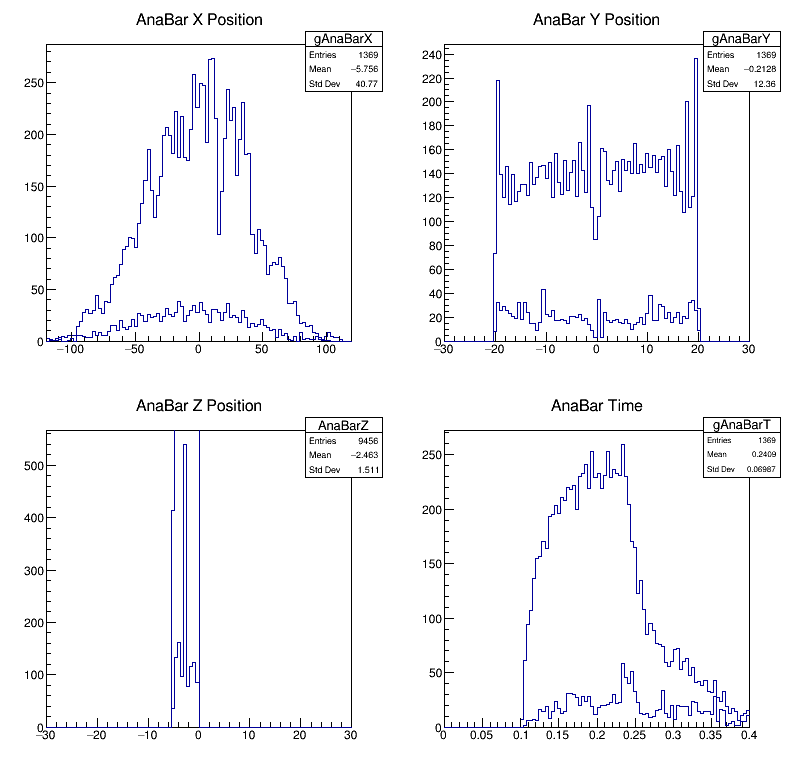

In [37]:
c5.Draw()

In [38]:
c6 = root.TCanvas("c6", "c6", 800, 800)
c6.Divide(1,2, 0.01, 0.01, 0)

c6.cd(1)
hE1vsE2.Draw("COLZ")
c6.cd(2)
gE1vsE2.Draw("COLZ")

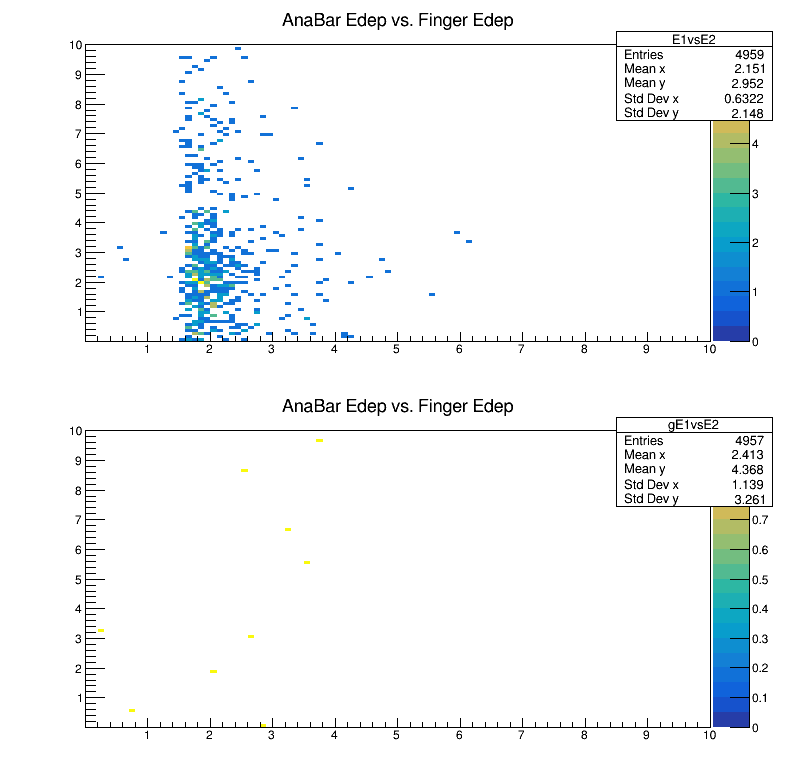

In [39]:
c6.Draw()

In [42]:
c7 = root.TCanvas("c7", "c7", 800, 800)
c7.Divide(2,3, 0.01, 0.01, 0)

c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
c7PE_MeV.Divide(1,2, 0.01, 0.01, 0)

c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)
c7Profile.Divide(1,2, 0.01, 0.01, 0)

c7.cd(1)
hFinger_Edep_vs_Nphot.Draw("COLZ")
c7.cd(2)
gFinger_Edep_vs_Nphot.Draw("COLZ")
c7.cd(3)
hAnaBar_Edep_vs_Nphot.Draw("COLZ")
c7.cd(4)
gAnaBar_Edep_vs_Nphot.Draw("COLZ")
c7.cd(5)
hNphot0_vs_Nphot1.Draw("COLZ")
c7.cd(6)
gNphot0_vs_Nphot1.Draw("COLZ")

c7Profile.cd(1)
profh = hAnaBar_Edep_vs_Nphot.ProfileX()
profh.Fit("pol1")
c7Profile.cd(2)
profg = gAnaBar_Edep_vs_Nphot.ProfileX()
profg.Fit("pol1")

c7PE_MeV.cd(1)
hAnaBar_Edep_vs_Nphot.Draw("COLZ")
c7PE_MeV.cd(2)
gAnaBar_Edep_vs_Nphot.Draw("COLZ")


****************************************
Minimizer is Linear / Migrad
Chi2                      =      652.886
NDf                       =          107
p0                        =   -0.0592422   +/-   0.0135961   
p1                        =    0.0543786   +/-   0.000213424 

****************************************
Minimizer is Linear / Migrad
Chi2                      =       31.836
NDf                       =            1
p0                        =     0.428069   +/-   0.109922    
p1                        =    0.0486928   +/-   0.00418844  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c7
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c7PE_MeV
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c7Profile


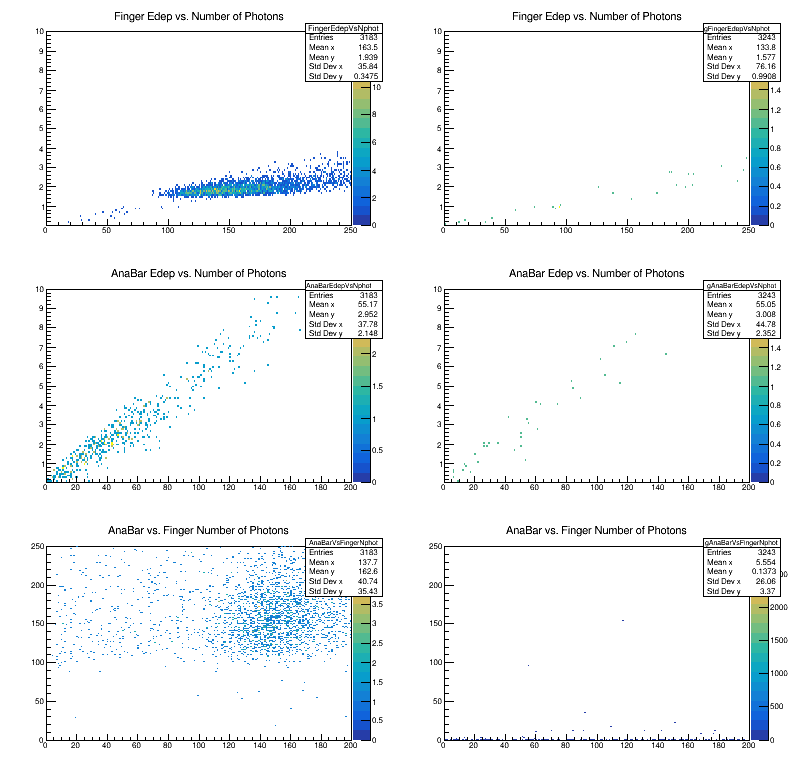

In [43]:
c7.Draw()

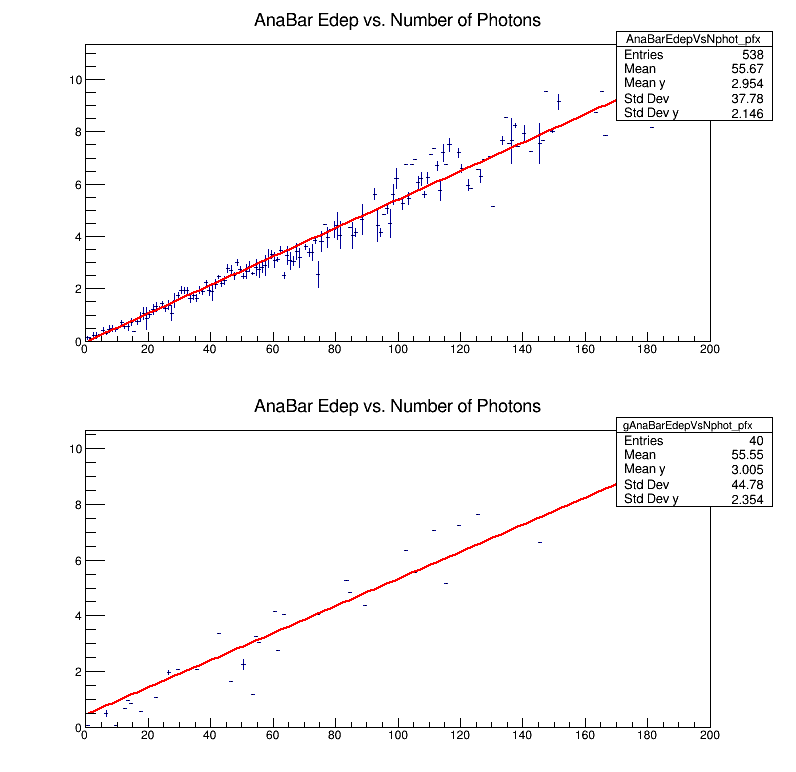

In [44]:
c7Profile.Draw()

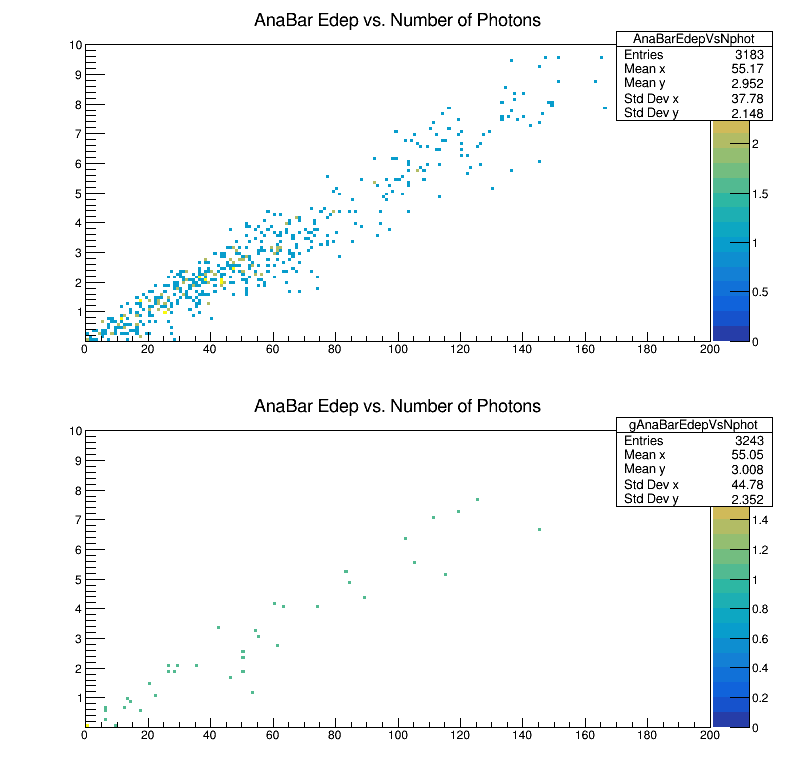

In [45]:
c7PE_MeV.Draw()

In [68]:
cEd = root.TCanvas("cEd", "cEd", 800,800)
cEd.Divide(4,4)


for i in range(NUMPADDLE):
    cEd.cd(i+1)    
    hAnaBarEdAll[i].Draw()
    gAnaBarEdAll[i].SetFillColor(2)
    gAnaBarEdAll[i].Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cEd


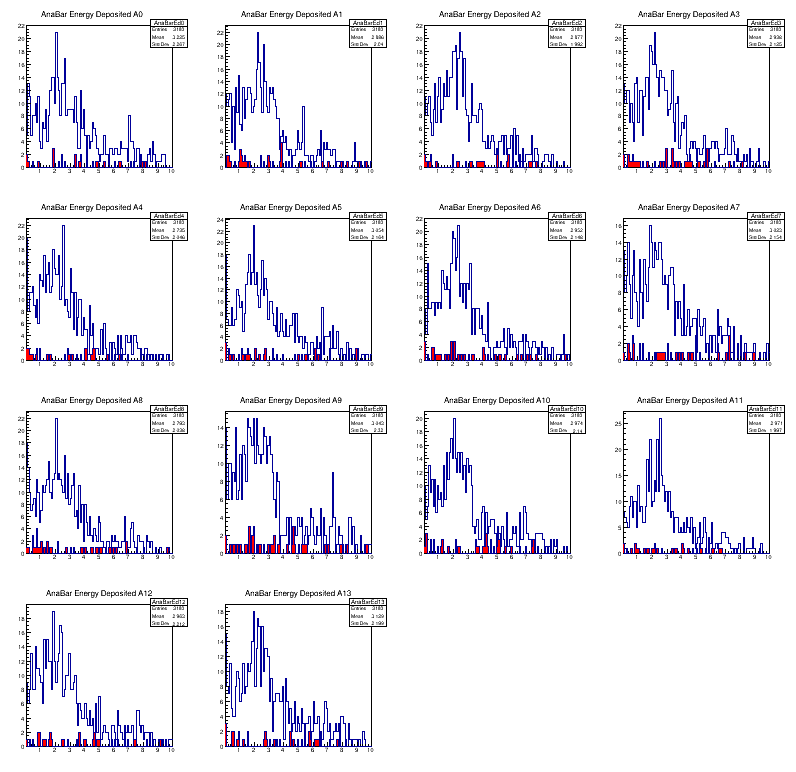

In [69]:
cEd.Draw()

In [62]:
c9 = root.TCanvas("c9", "c9", 800,800)

for i in range(NUMPADDLE):
        c9.cd()
        xl = 0.25*(i%4)
        xh = 0.25*(i%4)+0.25
        yl = 0.33*(i%3)
        yh = 0.33*(i%3)+0.33
        pad = root.TPad("pad","pad",xl,yl,xh,yh)
        pad.SetLogy(True)
        pad.Draw()
        pad.cd()
        hAnaBarPMTNphot[i].Draw()
        #hAnaBarPMTNoiseCutNphot[i].Draw("SAME")
        gAnaBarPMTNphot[i].SetFillColor(2)
        gAnaBarPMTNphot[i].Draw("same")
        #gAnaBarPMTNoiseCutNphot[i].Draw("SAME")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c9


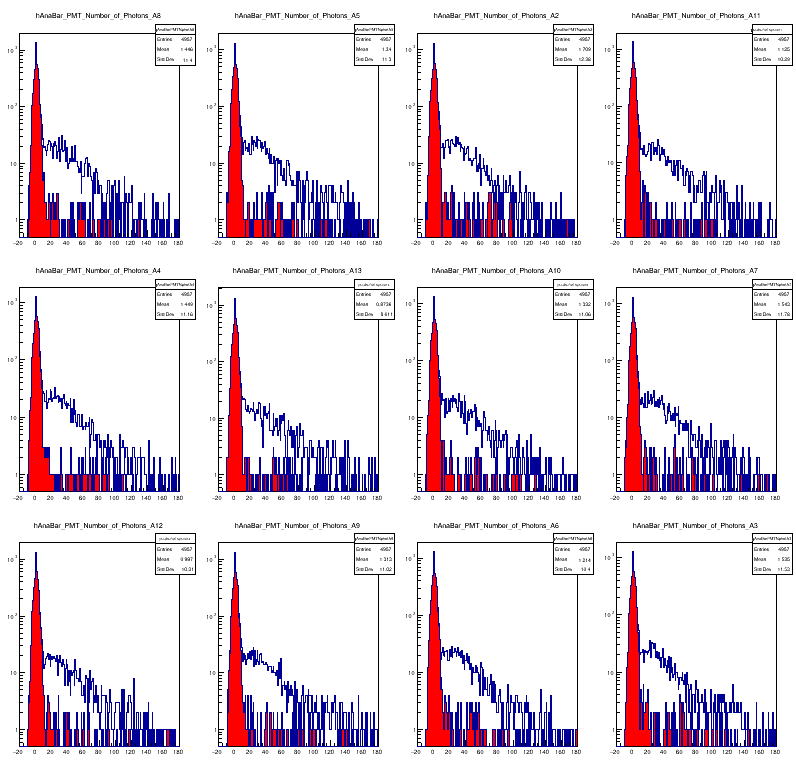

In [63]:
c9.Draw()

In [74]:
c11 = root.TCanvas("c11", "c11", 800,800)
c11.Divide(1,1, 0.01, 0.01, 0)

c11.cd(1)
hAnaBarMult.SetFillColor(3)
hAnaBarMult.Draw()
gAnaBarMult.SetFillColor(2)
gAnaBarMult.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c11


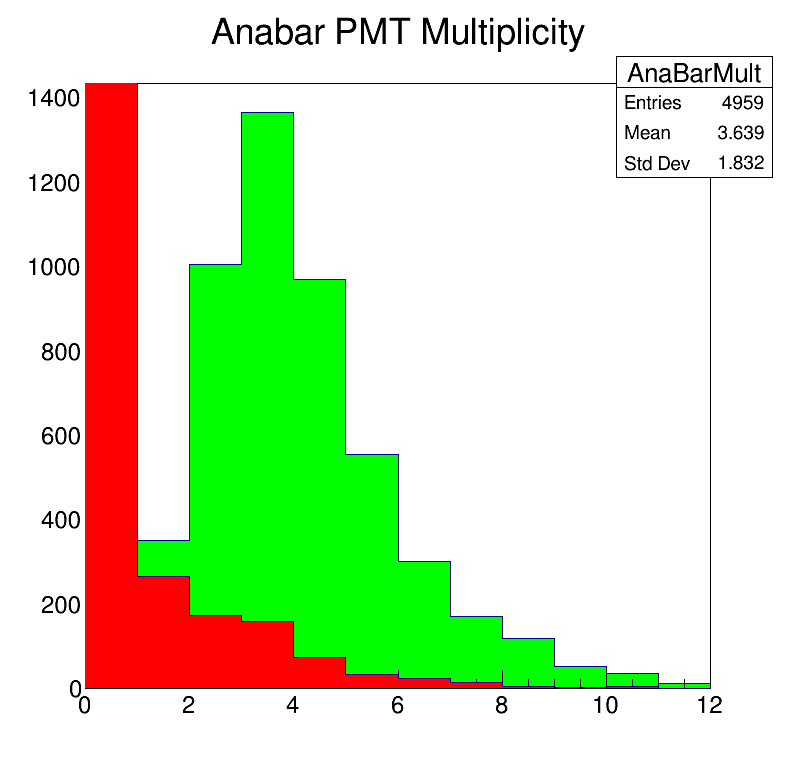

In [75]:
c11.Draw()